### POST PRUNNING IN DECISION Tree

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)   
df['target'] = iris.target

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# independent and dependent variables
X = df.drop('target', axis=1) # independent variables
y = df['target'] # dependent variable

In [6]:
X.head()# independent variables


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [9]:
from sklearn.tree import DecisionTreeClassifier

cl = DecisionTreeClassifier(random_state=42)
cl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

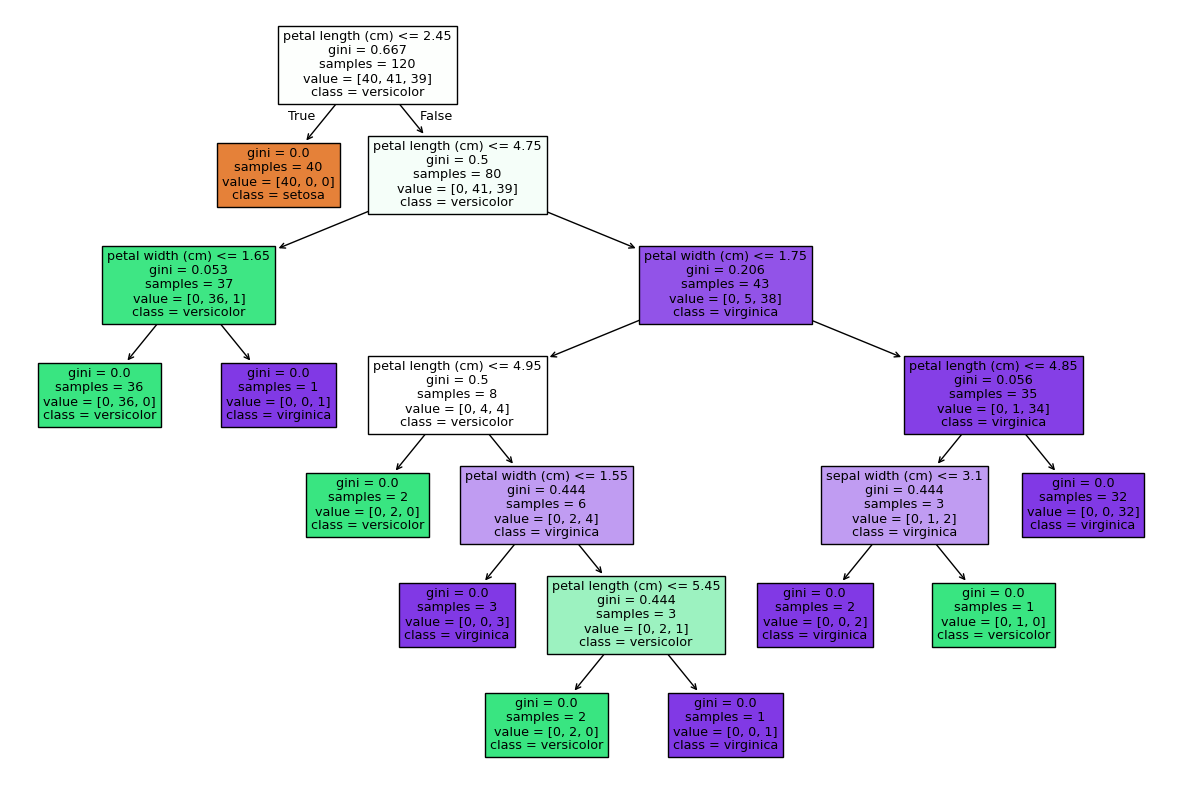

In [10]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(cl, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [11]:
y_pred = cl.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [14]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


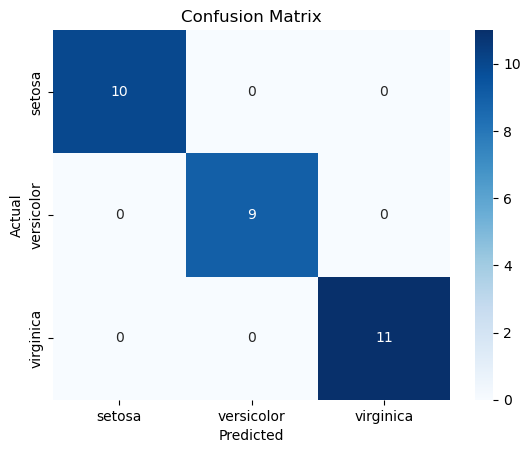

In [15]:
import seaborn as sns
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')    
plt.title('Confusion Matrix')
plt.show()

In [16]:
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

